# Exploratory Data Analysis of the Extended Palmer Penguins Dataset

Author: Sophia Pürner

## Step 1: Set Up the Environment and Import Libraries

#### Creating and activating the conda environment

```bash
$ conda create -n penguin_dataset_env -c conda-forge python=3.12 seaborn kagglehub pandas matplotlib notebook jupyter ipykernel
$ conda activate penguin_dataset_env
# PyCharm Settings -> select interpreter: penguin_dataset_env

#### Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

## Step 2: Load the Data

#### Download the dataset from Kaggle

In [2]:
# Download latest version
path = kagglehub.dataset_download("samybaladram/palmers-penguin-dataset-extended")
print("Path to dataset files:", path)

Path to dataset files: /home/sophia/.cache/kagglehub/datasets/samybaladram/palmers-penguin-dataset-extended/versions/2


#### Get the path to the csv file

In [3]:
path_to_csv = path + "/palmerpenguins_extended.csv"
print("Path to csv file 'palmerspenguins_extended':", path_to_csv)

Path to csv file 'palmerspenguins_extended': /home/sophia/.cache/kagglehub/datasets/samybaladram/palmers-penguin-dataset-extended/versions/2/palmerpenguins_extended.csv


#### Load the data into a pandas DataFrame and get a first overview

In [4]:
penguin_data = pd.read_csv(path_to_csv)
penguin_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


#### Check the dimensions of the dataset

In [5]:
penguin_data.shape

(3430, 11)

## Step 3: Explore the Data

#### Overview of features and their values

In [6]:
features = penguin_data.columns
for e in features:
    if type(penguin_data[e][0]) == str:
        print(f"{e}: {penguin_data[e].unique()}")
    else:
        print(f"{e}: {penguin_data[e].min()} - {penguin_data[e].max()}")

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Biscoe' 'Dream' 'Torgensen']
bill_length_mm: 13.6 - 88.2
bill_depth_mm: 9.1 - 27.9
flipper_length_mm: 140.0 - 308.0
body_mass_g: 2477.0 - 10549.0
sex: ['female' 'male']
diet: ['fish' 'krill' 'parental' 'squid']
life_stage: ['adult' 'juvenile' 'chick']
health_metrics: ['overweight' 'healthy' 'underweight']
year: 2021 - 2025


#### Select all numeric columns (except 'year') and store in a list

In [7]:
features_numeric = list(penguin_data.select_dtypes(include="number").columns.drop("year"))
features_numeric

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

#### Boxplots per feature, grouped by species

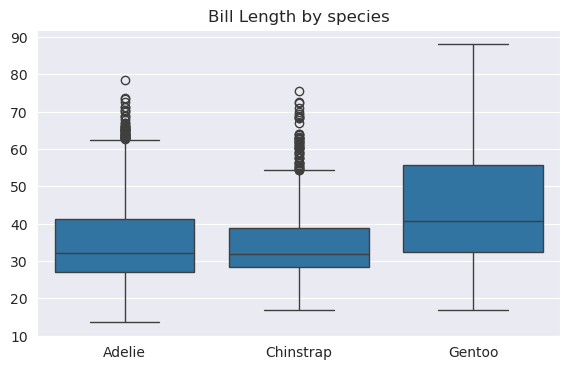

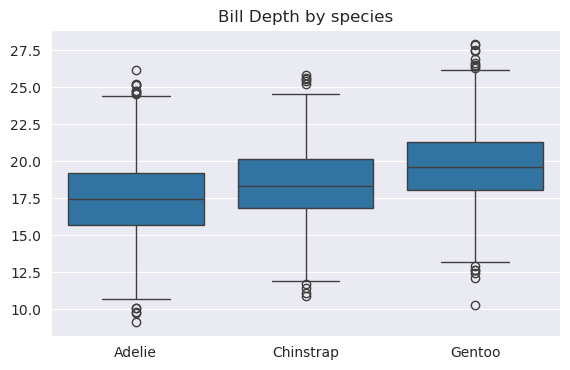

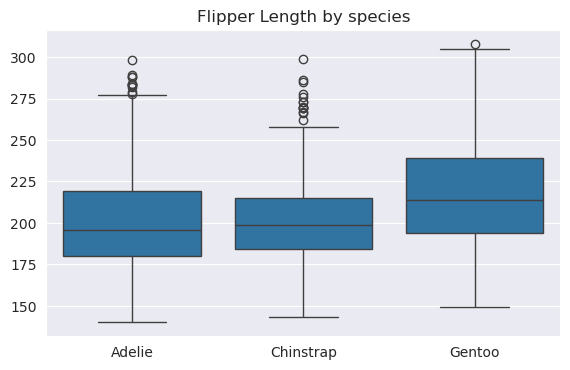

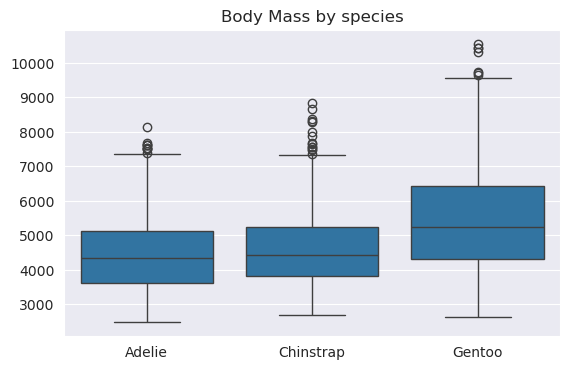

In [11]:
for col in features_numeric:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="species", y=col, data=penguin_data)
    plt.title(f"{col.replace("_", " ").title().removesuffix(" Mm").removesuffix(" G")} by species")
    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

#### Feature distributions by species

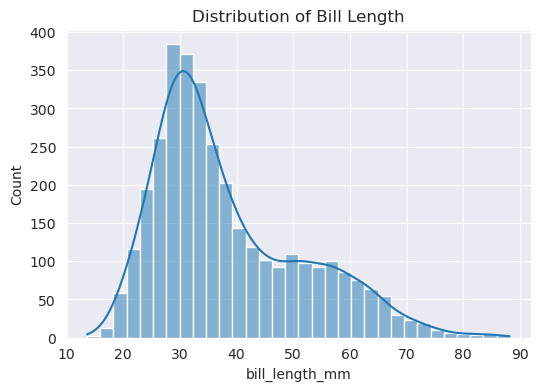

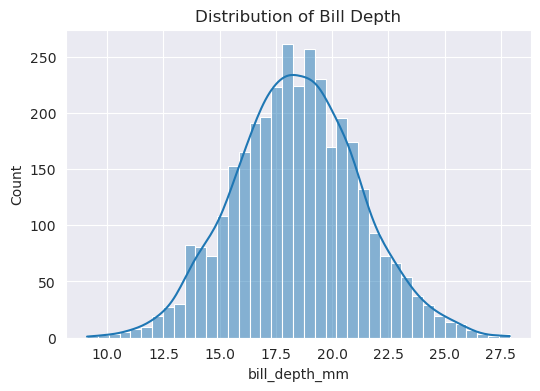

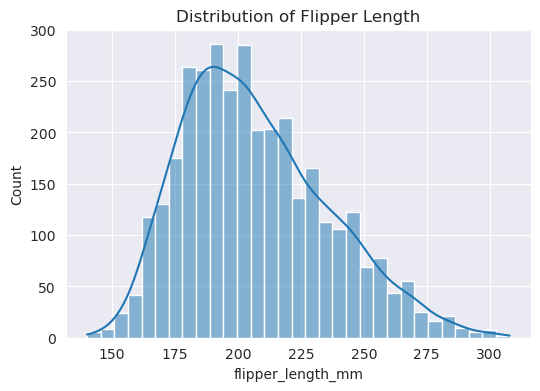

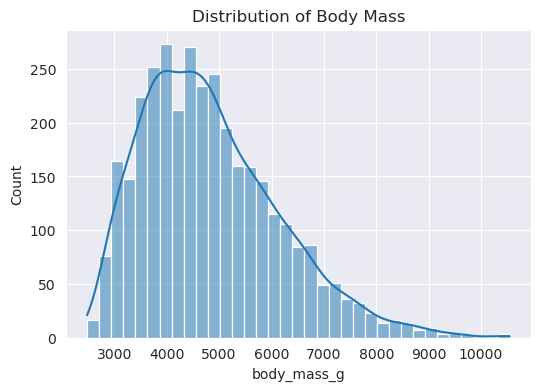

In [10]:
for col in features_numeric:
    plt.figure(figsize=(6, 4))
    sns.histplot(penguin_data[col], kde=True)
    hue="species"
    plt.title(f"Distribution of {col.replace("_", " ").title().removesuffix(" Mm").removesuffix(" G")}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### Pairplot with species as hue

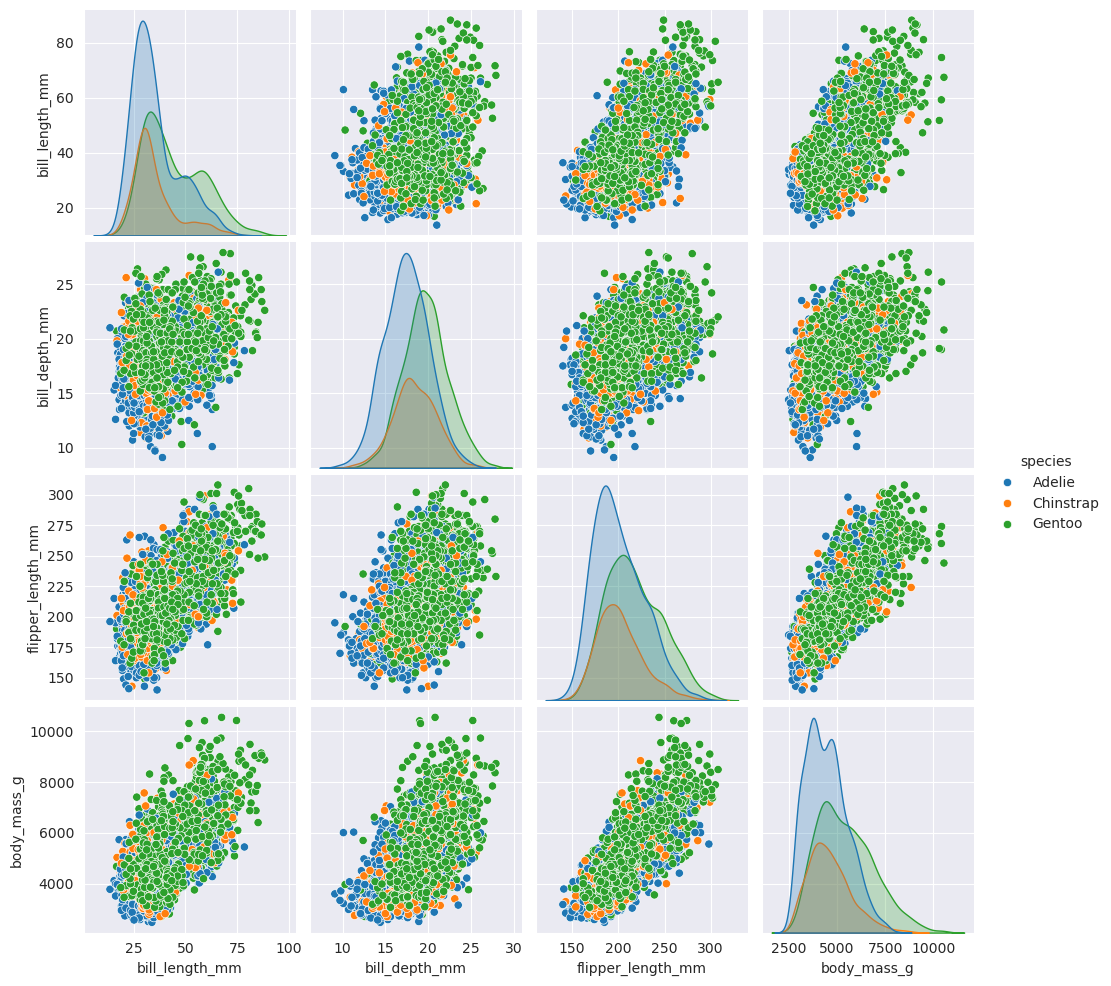

In [12]:
sns.pairplot(penguin_data[features_numeric + ["species"]], hue="species")
plt.show()

#### Distinguishing Species by Life Stage

To better understand how species can be classified, the dataset is split by life stage. This helps to examine whether certain features are more distinctive in specific developmental stages.


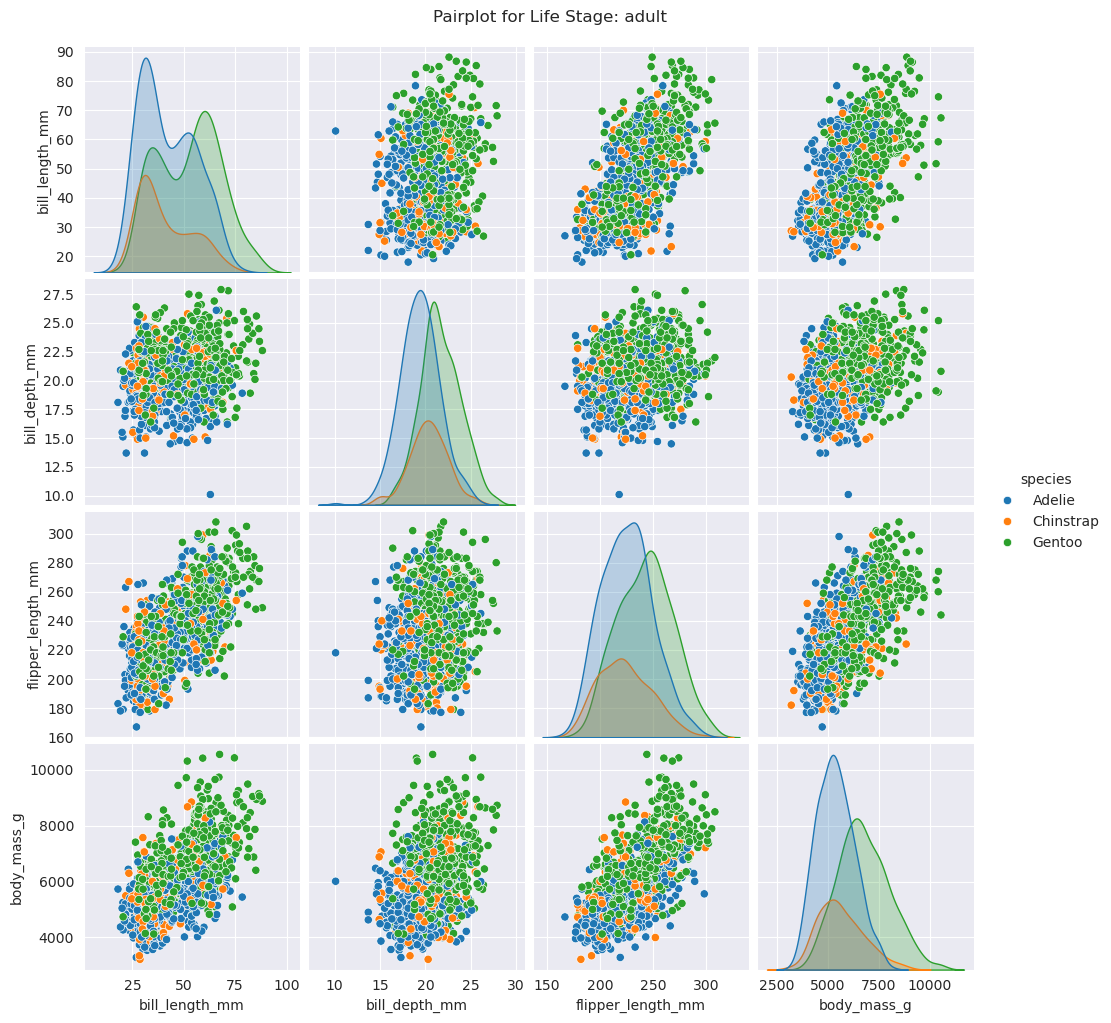

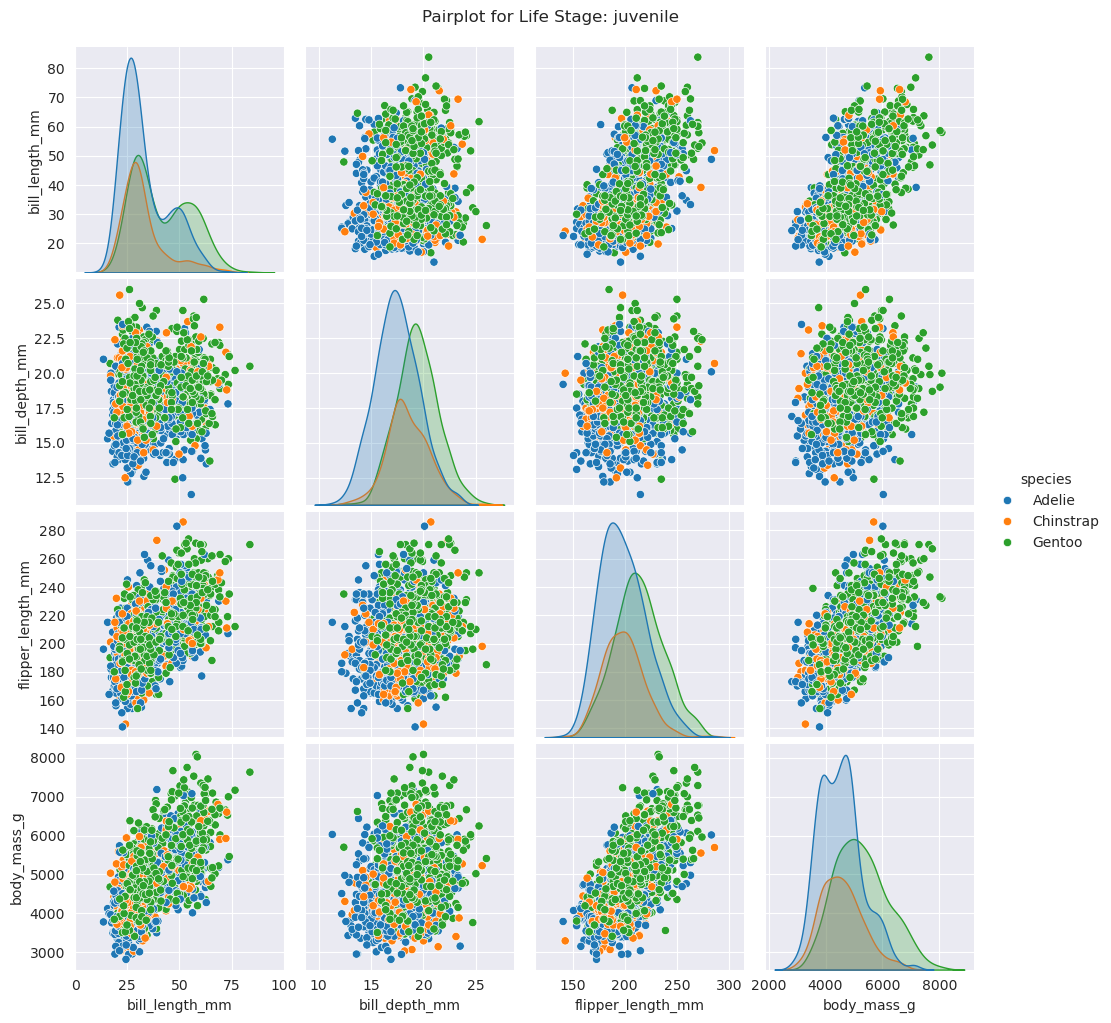

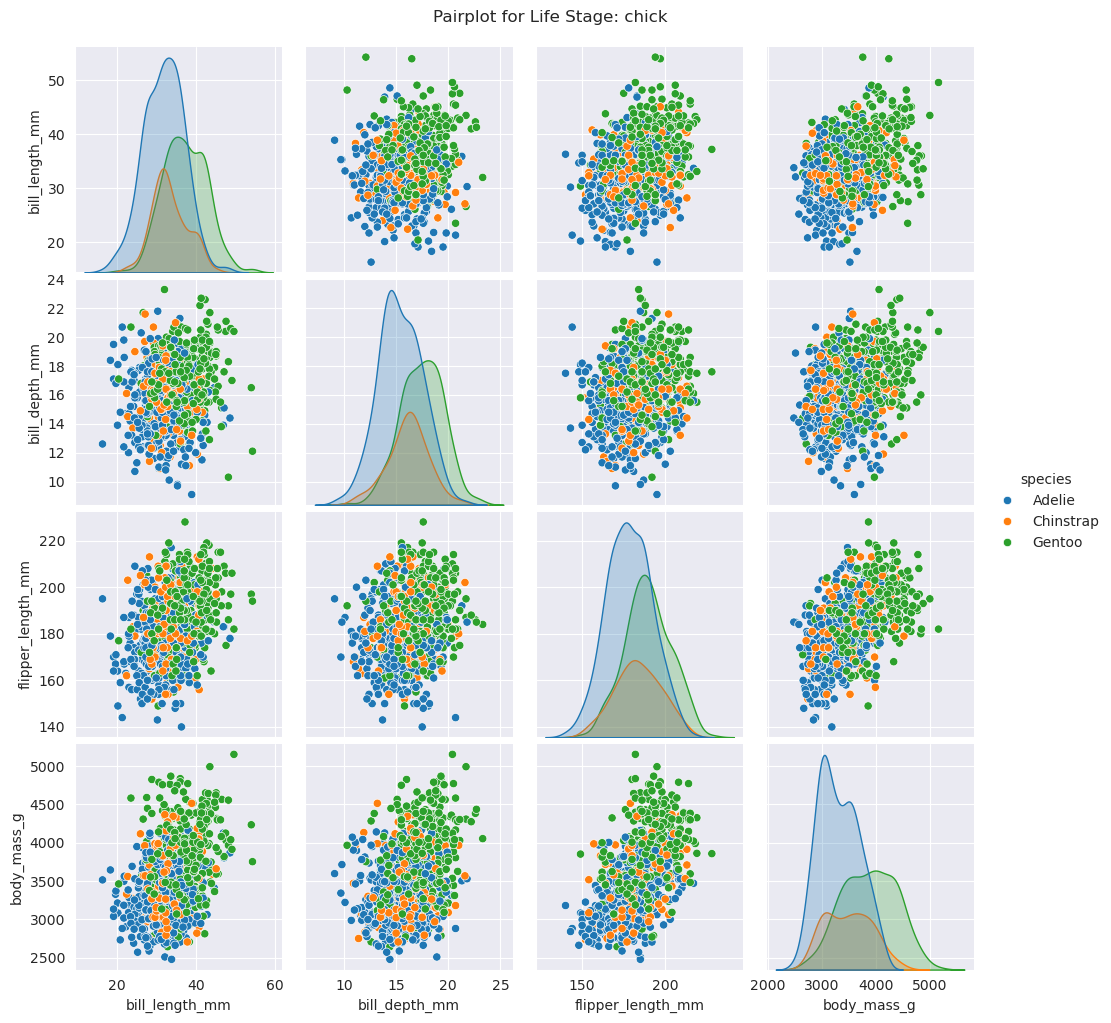

In [13]:
# Loop over all life stages and create a separate pairplot for each
life_stages = penguin_data["life_stage"].dropna().unique()

for stage in life_stages:
    subset = penguin_data[penguin_data["life_stage"] == stage]
    sns.pairplot(subset[features_numeric + ["species"]], hue="species")
    plt.suptitle(f"Pairplot for Life Stage: {stage}", y=1.02)
    plt.show()

#### Feature Correlation Heatmap

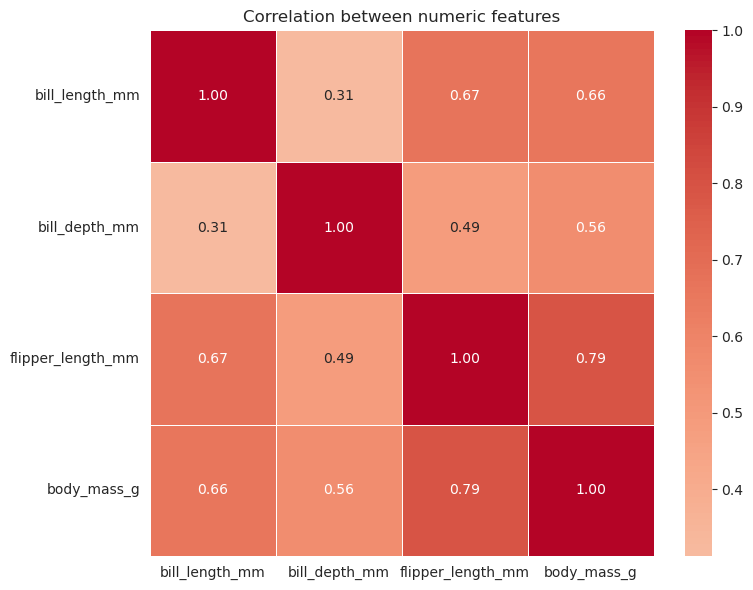

In [14]:
# Calculate correlation matrix for numeric features (excluding 'year')
corr_matrix = penguin_data[features_numeric].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation between numeric features")
plt.tight_layout()
plt.show()

#### Interpretation of the Correlation Heatmap

The heatmap reveals several moderate to strong positive correlations among the numeric features:

- **Bill length and flipper length** show a moderately strong correlation (**r = 0.67**), suggesting that penguins with longer bills tend to also have longer flippers.
- **Bill length and body mass** are similarly correlated (**r = 0.66**), indicating that heavier penguins tend to have longer bills.
- **Bill depth** has moderate correlations with both **flipper length (r = 0.49)** and **body mass (r = 0.56)**. Penguins with deeper bills are likely to have heavier bodies and longer flippers.
- **Bill length and bill depth** are only weakly correlated (**r = 0.31**), implying these features provide somewhat independent information.
- The strongest correlation is between **flipper length and body mass** (**r = 0.79**), showing that flipper length is a good indicator of overall body size.

These correlations suggest that while some features (e.g., flipper length and body mass) are strongly related, others (like bill depth and bill length) provide more complementary information. For species classification or modeling, it may be useful to consider dimensionality reduction techniques or feature selection to avoid redundancy.

> Note: Correlation does not imply causation — these relationships show statistical associations, not necessarily biological mechanisms.


## Conclusions

The most relevant features for species differentiation are `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`.

However, even when splitting the dataset by life stage (chick, juvenile, adult), considerable overlap in feature distributions remains. This suggests that these features alone may not be sufficient to reliably distinguish between Adelie, Chinstrap, and Gentoo penguins at all developmental stages.

A multivariate approach, potentially involving dimensionality reduction or classification models, may help uncover more subtle patterns and improve species classification accuracy.

## Session Info

Python: 3.12.10
pandas: 2.2.3
matplotlib: 3.10.3
kagglehub: 0.3.8
seaborn: 0.13.2